<a href="https://colab.research.google.com/github/dipenthakercalypso/Image-and-Text-Labelling-and-Classification-Issues-Resolution/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Question 1**
The Mystery Polynomial [Programming Question]:
You have been given a dataset in regression_data.csv. This data was generated from a noisy polynomial function with a degree of 6 or less. Your task is to find this function.
Instructions:

• Load the data and split it into an 80% training set and a 20% testing set.

• Build and evaluate six polynomial regression models with degrees n = 1 through n = 6. • For each model, calculate and record error metrics of your choice (e.g., Mean Squared Error, R-squared) on both the training and testing sets.

• Report the most likely polynomial function that generated the data, along with your justification based on the error metrics. **Note**: Increasing the degree of the polynomial will obviously reduce training error, so, do not rely solely on training errors for model selection.

Plotting a scatter plot to view the relationship between X and Y so as to get an idea on the possible degree of polynomial that may fit the given data

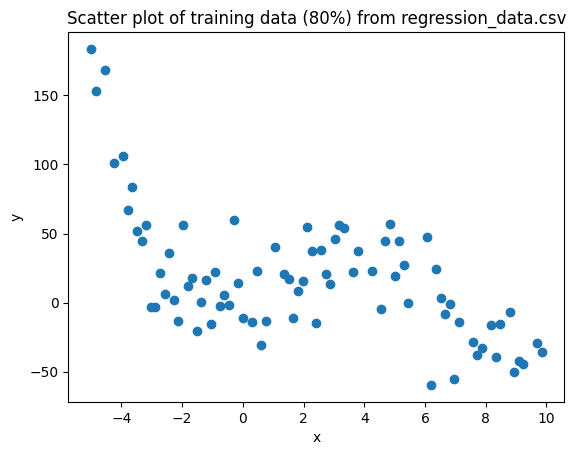

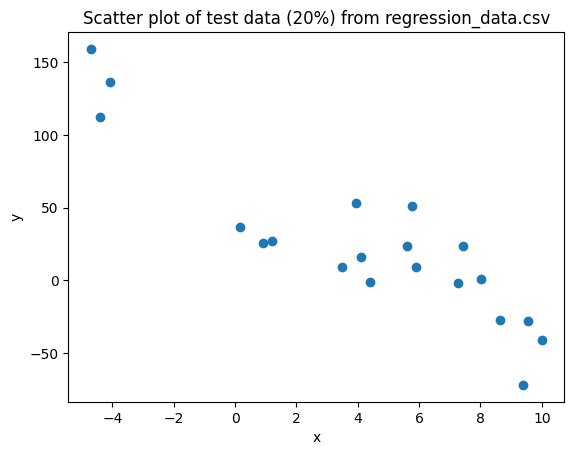

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('/content/sample_data/regression_data.csv')

X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33
)

plt.scatter(X_train['x'], y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of training data (80%) from regression_data.csv')
plt.show()

plt.scatter(X_test['x'], y_test)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of test data (20%) from regression_data.csv')
plt.show()

Looking at the above scatter plot generated from given data, X and Y, **it looks like maybe a 2+1 = 3 degree polynomial or a 3+1 = 4 degree polynomial may fit better or best for the given data**

### **One degree polynomial model**

Intercept: 30.79073063709162
Coefficient: -6.338981513827533


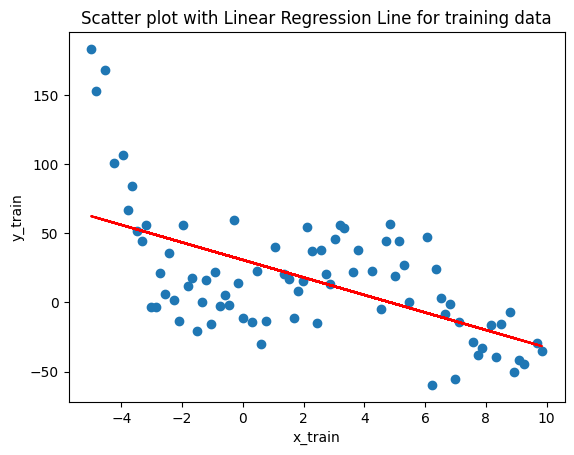

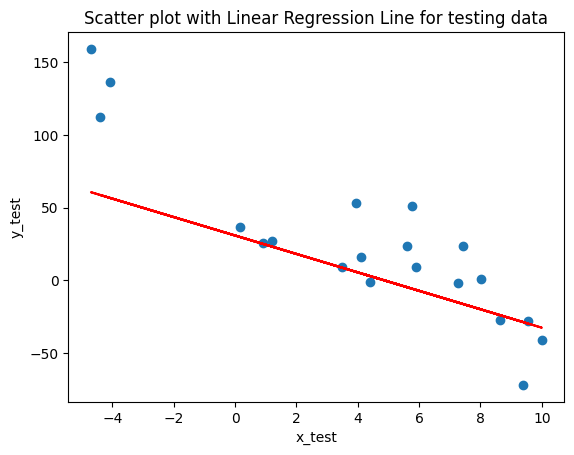


--- Model Evaluation on Test Data ---
Mean Squared Error (MSE): 1488.6354
Mean Absolute Error (MAE): 26.8748
R-squared (R2): 0.5156

Model Intercept: 30.7907
Model Coefficient (Slope): -6.3390


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X_train = X_train['x'].values.reshape(-1, 1)
y_train = y_train.values

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Scatter plot with Linear Regression Line for training data')
plt.show()

X_test = X_test['x'].values.reshape(-1, 1)

plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.title('Scatter plot with Linear Regression Line for testing data')
plt.show()

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"\nModel Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient (Slope): {model.coef_[0]:.4f}")

The **one degree polynomial model** is y = coeff(x) + intercept, which is **y = -6.81586600456658(x) + 35.565070175736054**

### **Two degree polynomial model**

Intercept: 25.811794865174146
Coefficient (x): -8.300936790289366
Coefficient (x2): 0.4065274112984492


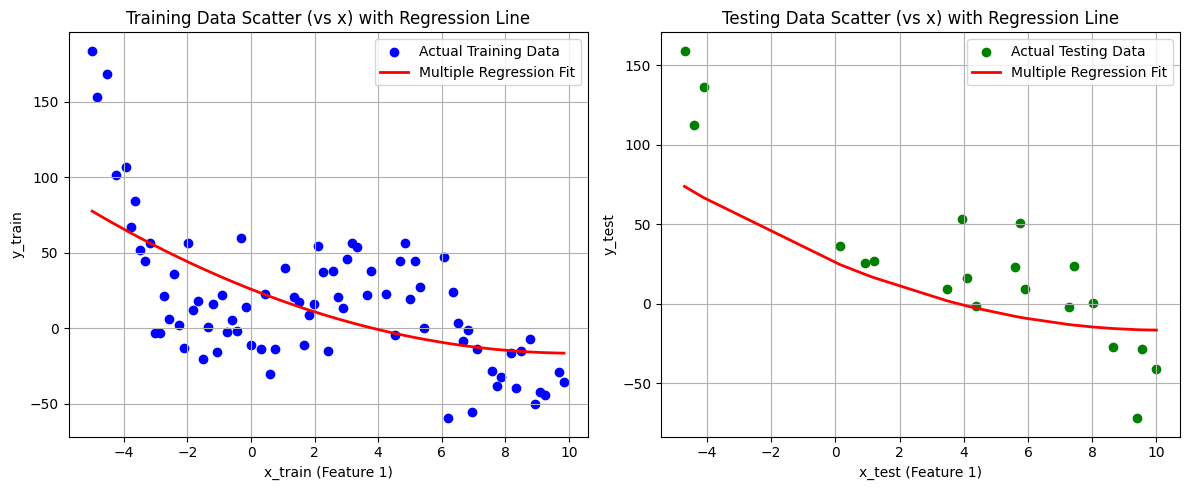


--- Model Evaluation on Test Data ---
Mean Squared Error (MSE): 1401.4218
Mean Absolute Error (MAE): 29.1701
R-squared (R2): 0.5440

Model Intercept: 25.8118
Model Coefficient (x): -8.3009


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('/content/sample_data/regression_data_multipleX.csv')

X = df[['x', 'x2']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33
)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient (x):", model.coef_[0])
print("Coefficient (x2):", model.coef_[1])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(X_train['x'], y_train, color='blue', label='Actual Training Data')
sort_idx_train = X_train['x'].argsort()
plt.plot(X_train['x'].iloc[sort_idx_train], y_train_pred[sort_idx_train],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_train (Feature 1)')
plt.ylabel('y_train')
plt.title('Training Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)

plt.scatter(X_test['x'], y_test, color='green', label='Actual Testing Data')
sort_idx_test = X_test['x'].argsort()
plt.plot(X_test['x'].iloc[sort_idx_test], y_test_pred[sort_idx_test],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_test (Feature 1)')
plt.ylabel('y_test')
plt.title('Testing Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("\n--- Model Evaluation on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"\nModel Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient (x): {model.coef_[0]:.4f}")

### **Three degree polynomial model**

Intercept: 2.677049007410048
Coefficient (x): -2.33994707065721
Coefficient (x2): 3.2040082399694794


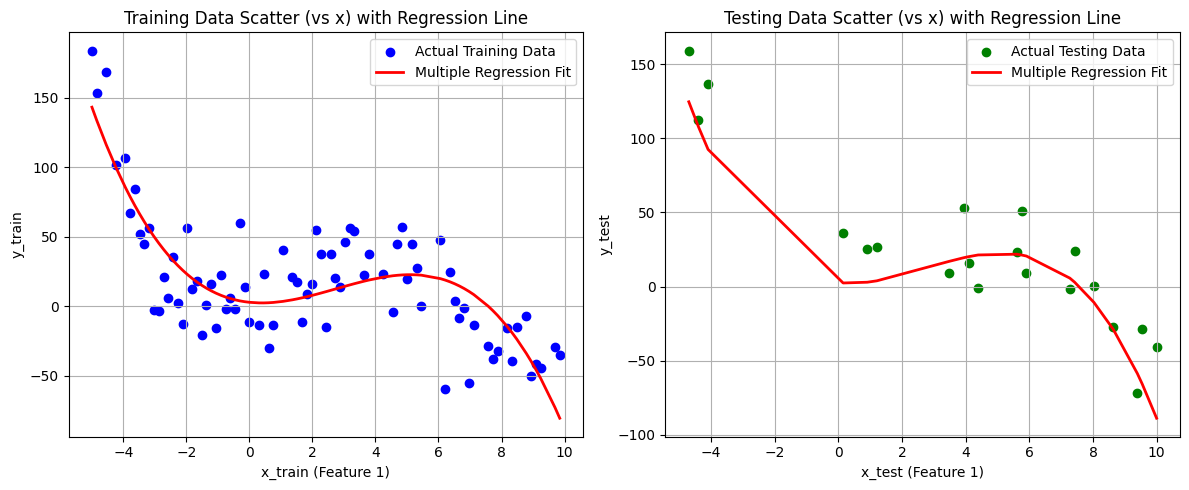


--- Model Evaluation on Test Data ---
Mean Squared Error (MSE): 627.3564
Mean Absolute Error (MAE): 20.6285
R-squared (R2): 0.7959

Model Intercept: 2.6770
Model Coefficient (x): -2.3399


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('/content/sample_data/regression_data_multipleX.csv')

X = df[['x', 'x2', 'x3']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33
)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient (x):", model.coef_[0])
print("Coefficient (x2):", model.coef_[1])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(X_train['x'], y_train, color='blue', label='Actual Training Data')
sort_idx_train = X_train['x'].argsort()
plt.plot(X_train['x'].iloc[sort_idx_train], y_train_pred[sort_idx_train],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_train (Feature 1)')
plt.ylabel('y_train')
plt.title('Training Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)

plt.scatter(X_test['x'], y_test, color='green', label='Actual Testing Data')
sort_idx_test = X_test['x'].argsort()
plt.plot(X_test['x'].iloc[sort_idx_test], y_test_pred[sort_idx_test],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_test (Feature 1)')
plt.ylabel('y_test')
plt.title('Testing Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("\n--- Model Evaluation on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"\nModel Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient (x): {model.coef_[0]:.4f}")

### **Four degree polynomial model**

Intercept: 5.4636088791457595
Coefficient (x): 8.719855871273861
Coefficient (x2): 2.316473540571295


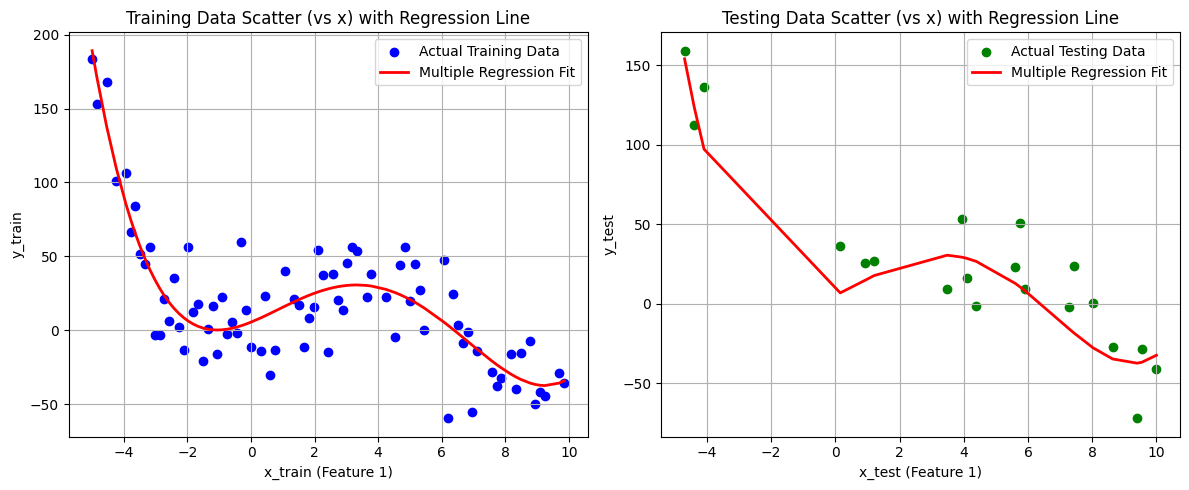


--- Model Evaluation on Test Data ---
Mean Squared Error (MSE): 530.7477
Mean Absolute Error (MAE): 19.2956
R-squared (R2): 0.8273

Model Intercept: 5.4636
Model Coefficient (x): 8.7199


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('/content/sample_data/regression_data_multipleX.csv')

X = df[['x', 'x2', 'x3', 'x4']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33
)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient (x):", model.coef_[0])
print("Coefficient (x2):", model.coef_[1])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(X_train['x'], y_train, color='blue', label='Actual Training Data')
sort_idx_train = X_train['x'].argsort()
plt.plot(X_train['x'].iloc[sort_idx_train], y_train_pred[sort_idx_train],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_train (Feature 1)')
plt.ylabel('y_train')
plt.title('Training Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)

plt.scatter(X_test['x'], y_test, color='green', label='Actual Testing Data')
sort_idx_test = X_test['x'].argsort()
plt.plot(X_test['x'].iloc[sort_idx_test], y_test_pred[sort_idx_test],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_test (Feature 1)')
plt.ylabel('y_test')
plt.title('Testing Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("\n--- Model Evaluation on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"\nModel Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient (x): {model.coef_[0]:.4f}")

### **Five degree polynomial model**

Intercept: 3.7989874043170637
Coefficient (x): 8.523301418595716
Coefficient (x2): 2.8221378857832486


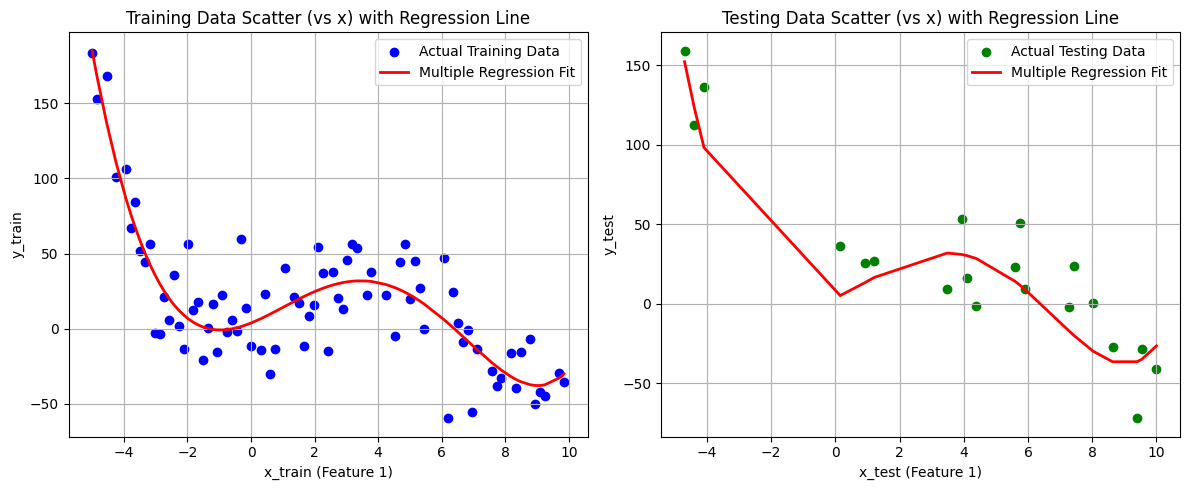


--- Model Evaluation on Test Data ---
Mean Squared Error (MSE): 562.0738
Mean Absolute Error (MAE): 20.1398
R-squared (R2): 0.8171

Model Intercept: 3.7990
Model Coefficient (x): 8.5233


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('/content/sample_data/regression_data_multipleX.csv')

X = df[['x', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33
)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient (x):", model.coef_[0])
print("Coefficient (x2):", model.coef_[1])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(X_train['x'], y_train, color='blue', label='Actual Training Data')
sort_idx_train = X_train['x'].argsort()
plt.plot(X_train['x'].iloc[sort_idx_train], y_train_pred[sort_idx_train],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_train (Feature 1)')
plt.ylabel('y_train')
plt.title('Training Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)

plt.scatter(X_test['x'], y_test, color='green', label='Actual Testing Data')
sort_idx_test = X_test['x'].argsort()
plt.plot(X_test['x'].iloc[sort_idx_test], y_test_pred[sort_idx_test],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_test (Feature 1)')
plt.ylabel('y_test')
plt.title('Testing Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("\n--- Model Evaluation on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"\nModel Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient (x): {model.coef_[0]:.4f}")

### **Six degree polynomial model**

Intercept: 4.223149125074912
Coefficient (x): 7.838056466911892
Coefficient (x2): 2.6682889694861465


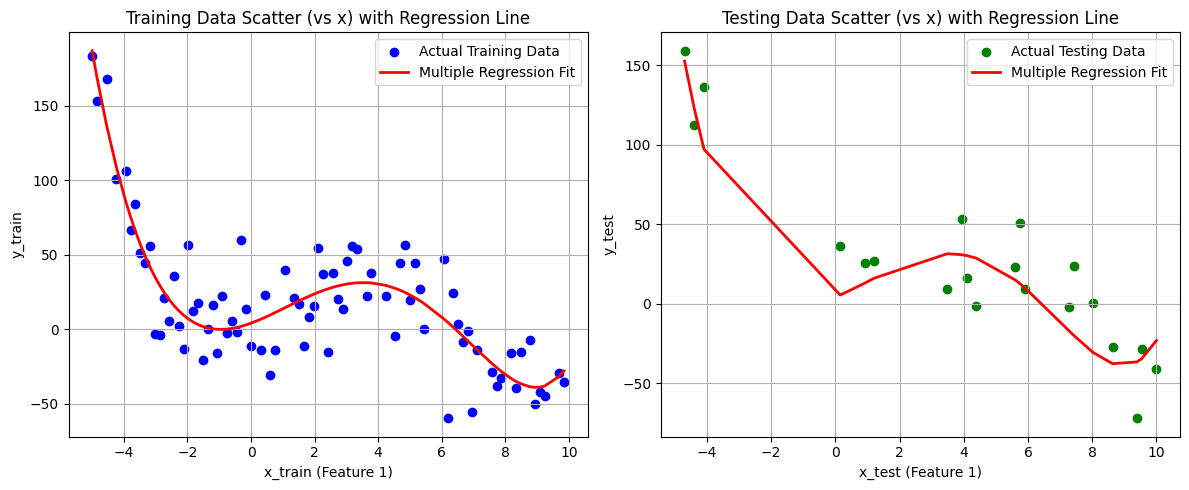


--- Model Evaluation on Test Data ---
Mean Squared Error (MSE): 568.8824
Mean Absolute Error (MAE): 20.3057
R-squared (R2): 0.8149

Model Intercept: 4.2231
Model Coefficient (x): 7.8381


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('/content/sample_data/regression_data_multipleX.csv')

X = df[['x', 'x2', 'x3', 'x4', 'x5', 'x6']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33
)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Intercept:", model.intercept_)
print("Coefficient (x):", model.coef_[0])
print("Coefficient (x2):", model.coef_[1])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

plt.scatter(X_train['x'], y_train, color='blue', label='Actual Training Data')
sort_idx_train = X_train['x'].argsort()
plt.plot(X_train['x'].iloc[sort_idx_train], y_train_pred[sort_idx_train],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_train (Feature 1)')
plt.ylabel('y_train')
plt.title('Training Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)

plt.scatter(X_test['x'], y_test, color='green', label='Actual Testing Data')
sort_idx_test = X_test['x'].argsort()
plt.plot(X_test['x'].iloc[sort_idx_test], y_test_pred[sort_idx_test],
         color='red', linewidth=2, label='Multiple Regression Fit')
plt.xlabel('x_test (Feature 1)')
plt.ylabel('y_test')
plt.title('Testing Data Scatter (vs x) with Regression Line')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("\n--- Model Evaluation on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"\nModel Intercept: {model.intercept_:.4f}")
print(f"Model Coefficient (x): {model.coef_[0]:.4f}")

**Consolidate everything results for Question 1**

In [ ]:
intercepts = {}
coefficients = {}
mse_scores = {}
r2_scores = {}

In [ ]:
# Degree 1
intercepts[1] = 30.7907
coefficients[1] = [-6.3390]
mse_scores[1] = 1488.6354
r2_scores[1] = 0.5156

# Degree 2
intercepts[2] = 25.8118
coefficients[2] = [-8.3009, 0.4065]
mse_scores[2] = 1401.4218
r2_scores[2] = 0.5440

# Degree 3
intercepts[3] = 2.6770
coefficients[3] = [-2.3399, 3.2040, -0.1581]
mse_scores[3] = 627.3564
r2_scores[3] = 0.7959

# Degree 4
intercepts[4] = 5.4636
coefficients[4] = [8.7199, 2.3165, -0.5947, -0.0525]
mse_scores[4] = 530.7477
r2_scores[4] = 0.8273

# Degree 5
intercepts[5] = 3.7990
coefficients[5] = [8.5233, 2.8221, -0.7872, -0.0194, 0.0046]
mse_scores[5] = 562.0738
r2_scores[5] = 0.8171

# Degree 6
intercepts[6] = 4.2231
coefficients[6] = [7.8381, 2.6683, -0.7370, -0.0097, 0.0056, -0.00009724]
mse_scores[6] = 568.8824
r2_scores[6] = 0.8149

print("Intercepts:", intercepts)
print("Coefficients:", coefficients)
print("MSE Scores (Test):", mse_scores)
print("R-squared Scores (Test):", r2_scores)

Intercepts: {1: 30.7907, 2: 25.8118, 3: 2.677, 4: 5.4636, 5: 3.799, 6: 4.2231}
Coefficients: {1: [-6.339], 2: [-8.3009, 0.4065], 3: [-2.3399, 3.204, -0.1581], 4: [8.7199, 2.3165, -0.5947, -0.0525], 5: [8.5233, 2.8221, -0.7872, -0.0194, 0.0046], 6: [7.8381, 2.6683, -0.737, -0.0097, 0.0056, -9.724e-05]}
MSE Scores (Test): {1: 1488.6354, 2: 1401.4218, 3: 627.3564, 4: 530.7477, 5: 562.0738, 6: 568.8824}
R-squared Scores (Test): {1: 0.5156, 2: 0.544, 3: 0.7959, 4: 0.8273, 5: 0.8171, 6: 0.8149}


In [ ]:
import pandas as pd

summary_df = pd.DataFrame({
    'Intercept': intercepts,
    'Coefficients': coefficients,
    'MSE (Test)': mse_scores,
    'R-squared (Test)': r2_scores
})

summary_df.index.name = 'Polynomial Degree'

display(summary_df)

,Intercept,Coefficients,MSE (Test),R-squared (Test)
Polynomial Degree,,,,
1,30.7907,[-6.339],1488.6354,0.5156
2,25.8118,"[-8.3009, 0.4065]",1401.4218,0.5440
3,2.6770,"[-2.3399, 3.204, -0.1581]",627.3564,0.7959
4,5.4636,"[8.7199, 2.3165, -0.5947, -0.0525]",530.7477,0.8273
5,3.7990,"[8.5233, 2.8221, -0.7872, -0.0194, 0.0046]",562.0738,0.8171
6,4.2231,"[7.8381, 2.6683, -0.737, -0.0097, 0.0056, -9.7...",568.8824,0.8149


In [ ]:
lowest_mse_degree = summary_df['MSE (Test)'].idxmin()
highest_r2_degree = summary_df['R-squared (Test)'].idxmax()

print(f"Polynomial degree with the lowest MSE on the test set: Degree {lowest_mse_degree}")
print(f"Polynomial degree with the highest R-squared on the test set: Degree {highest_r2_degree}")

print("\nAnalysis of Test Set Performance:")
print("Lower MSE indicates a better fit (less error).")
print("Higher R-squared indicates a better fit (more variance explained).")
print("Based on the test set metrics, the model with the lowest MSE and highest R-squared is likely the best fit.")

Polynomial degree with the lowest MSE on the test set: Degree 4
Polynomial degree with the highest R-squared on the test set: Degree 4

Analysis of Test Set Performance:
Lower MSE indicates a better fit (less error).
Higher R-squared indicates a better fit (more variance explained).
Based on the test set metrics, the model with the lowest MSE and highest R-squared is likely the best fit.


In [ ]:
best_degree = 4
best_intercept = intercepts[best_degree]
best_coefficients = coefficients[best_degree]

polynomial_function = f"y = {best_intercept:.4f}"

for i, coef in enumerate(best_coefficients):
    power = i + 1
    if coef >= 0:
        polynomial_function += f" + {coef:.4f}*x^{power}"
    else:
        polynomial_function += f" - {-coef:.4f}*x^{power}"

print(f"The polynomial function for the best-fitting model (Degree {best_degree}) is:")
print(polynomial_function)

The polynomial function for the best-fitting model (Degree 4) is:
y = 5.4636 + 8.7199*x^1 + 2.3165*x^2 - 0.5947*x^3 - 0.0525*x^4


In [ ]:
print("--- Model Comparison Summary ---")
print("We evaluated polynomial regression models with degrees 1 through 6 using Mean Squared Error (MSE) and R-squared on the test set.")
print("The test set performance is crucial for identifying the true underlying function and avoiding overfitting to the training data.")
print("\nEvaluation Metrics on Test Set:")
display(summary_df[['MSE (Test)', 'R-squared (Test)']])

best_degree = summary_df['MSE (Test)'].idxmin()
print(f"\nBased on the lowest MSE ({summary_df.loc[best_degree, 'MSE (Test)']:.4f}) and highest R-squared ({summary_df.loc[best_degree, 'R-squared (Test)']:.4f}) on the test set, the best-fitting model is the Polynomial Degree {best_degree}.")

best_intercept = summary_df.loc[best_degree, 'Intercept']
best_coefficients = summary_df.loc[best_degree, 'Coefficients']

polynomial_function = f"y = {best_intercept:.4f}"
for i, coef in enumerate(best_coefficients):
    power = i + 1
    if coef >= 0:
        polynomial_function += f" + {coef:.4f}*x^{power}"
    else:
        polynomial_function += f" - {-coef:.4f}*x^{power}"

print(f"\nThe most likely polynomial function that generated the data is (Degree {best_degree}):")
print(polynomial_function)

--- Model Comparison Summary ---
We evaluated polynomial regression models with degrees 1 through 6 using Mean Squared Error (MSE) and R-squared on the test set.
The test set performance is crucial for identifying the true underlying function and avoiding overfitting to the training data.

Evaluation Metrics on Test Set:


,MSE (Test),R-squared (Test)
Polynomial Degree,,
1,1488.6354,0.5156
2,1401.4218,0.5440
3,627.3564,0.7959
4,530.7477,0.8273
5,562.0738,0.8171
6,568.8824,0.8149



Based on the lowest MSE (530.7477) and highest R-squared (0.8273) on the test set, the best-fitting model is the Polynomial Degree 4.

The most likely polynomial function that generated the data is (Degree 4):
y = 5.4636 + 8.7199*x^1 + 2.3165*x^2 - 0.5947*x^3 - 0.0525*x^4


In [ ]:
print("--- Model Comparison Summary ---")
print("We evaluated polynomial regression models with degrees 1 through 6 using Mean Squared Error (MSE) and R-squared on the test set.")
print("The test set performance is crucial for identifying the true underlying function and avoiding overfitting to the training data.")
print("\nEvaluation Metrics on Test Set:")
display(summary_df[['MSE (Test)', 'R-squared (Test)']])

best_degree = summary_df['MSE (Test)'].idxmin()
print(f"\nBased on the lowest MSE ({summary_df.loc[best_degree, 'MSE (Test)']:.4f}) and highest R-squared ({summary_df.loc[best_degree, 'R-squared (Test)']:.4f}) on the test set, the best-fitting model is the Polynomial Degree {best_degree}.")

best_intercept = summary_df.loc[best_degree, 'Intercept']
best_coefficients = summary_df.loc[best_degree, 'Coefficients']

polynomial_function = f"y = {best_intercept:.4f}"
for i, coef in enumerate(best_coefficients):
    power = i + 1
    if coef >= 0:
        polynomial_function += f" + {coef:.4f}*x^{power}"
    else:
        polynomial_function += f" - {-coef:.4f}*x^{power}"

print(f"\nThe most likely polynomial function that generated the data is (Degree {best_degree}):")
print(polynomial_function)

--- Model Comparison Summary ---
We evaluated polynomial regression models with degrees 1 through 6 using Mean Squared Error (MSE) and R-squared on the test set.
The test set performance is crucial for identifying the true underlying function and avoiding overfitting to the training data.

Evaluation Metrics on Test Set:


,MSE (Test),R-squared (Test)
Polynomial Degree,,
1,1488.6354,0.5156
2,1401.4218,0.5440
3,627.3564,0.7959
4,530.7477,0.8273
5,562.0738,0.8171
6,568.8824,0.8149



Based on the lowest MSE (530.7477) and highest R-squared (0.8273) on the test set, the best-fitting model is the Polynomial Degree 4.

The most likely polynomial function that generated the data is (Degree 4):
y = 5.4636 + 8.7199*x^1 + 2.3165*x^2 - 0.5947*x^3 - 0.0525*x^4


## Summary - Question 1:

### Data Analysis Key Findings

*   The polynomial regression models were evaluated based on their performance on the test set using Mean Squared Error (MSE) and R-squared metrics.
*   The summary table shows that as the polynomial degree increases, the MSE generally decreases and the R-squared generally increases up to degree 4.
*   Specifically, the Degree 4 polynomial model achieved the lowest MSE of 530.7477 and the highest R-squared of 0.8273 on the test set.
*   The performance metrics started to worsen for models with degrees higher than 4 (Degree 5 MSE: 562.0738, R-squared: 0.8171; Degree 6 MSE: 568.8824, R-squared: 0.8149).

### Insights or Next Steps

*   The Degree 4 polynomial model is identified as the best fit because it exhibits the lowest MSE and highest R-squared on the test set, indicating better generalization to unseen data compared to other degrees.
*   The polynomial function for the best-fitting model (Degree 4) is determined to be:

y = 5.4636 + 8.7199\*x^1 + 2.3165\*x^2 - 0.5947\*x^3 - 0.0525\*x^4.


## **Question 2**
KNN with Cross-Validation [Programming Question]:
You are given a dataset point KNN.csv. Each row corresponds to a 2D point with
coordinates (x1, x2) and a class label (0 or 1).
Your tasks are:
(a) Load the dataset from point KNN.csv, and split it into 80% training and 20%
testing sets.
(b) Implement the K-Nearest Neighbors (KNN) algorithm for classification.
(c) Use 5-fold cross-validation on the training set to select the optimal number
of neighbors k. The aim is to avoid both high bias (underfitting) and high
variance (overfitting).
(d) Report the following:
• The value of k selected by cross-validation.
• Training accuracy, validation accuracy, and test accuracy.



--- Fold 1/5 Metrics ---
Accuracy (Correct Metric): 0.8958
Mean Squared Error (MSE): 0.1042
R-squared (R2): 0.5833

--- Fold 2/5 Metrics ---
Accuracy (Correct Metric): 0.8750
Mean Squared Error (MSE): 0.1250
R-squared (R2): 0.5000

--- Fold 3/5 Metrics ---
Accuracy (Correct Metric): 0.8958
Mean Squared Error (MSE): 0.1042
R-squared (R2): 0.5833

--- Fold 4/5 Metrics ---
Accuracy (Correct Metric): 0.9167
Mean Squared Error (MSE): 0.0833
R-squared (R2): 0.6667

--- Fold 5/5 Metrics ---
Accuracy (Correct Metric): 0.9167
Mean Squared Error (MSE): 0.0833
R-squared (R2): 0.6667


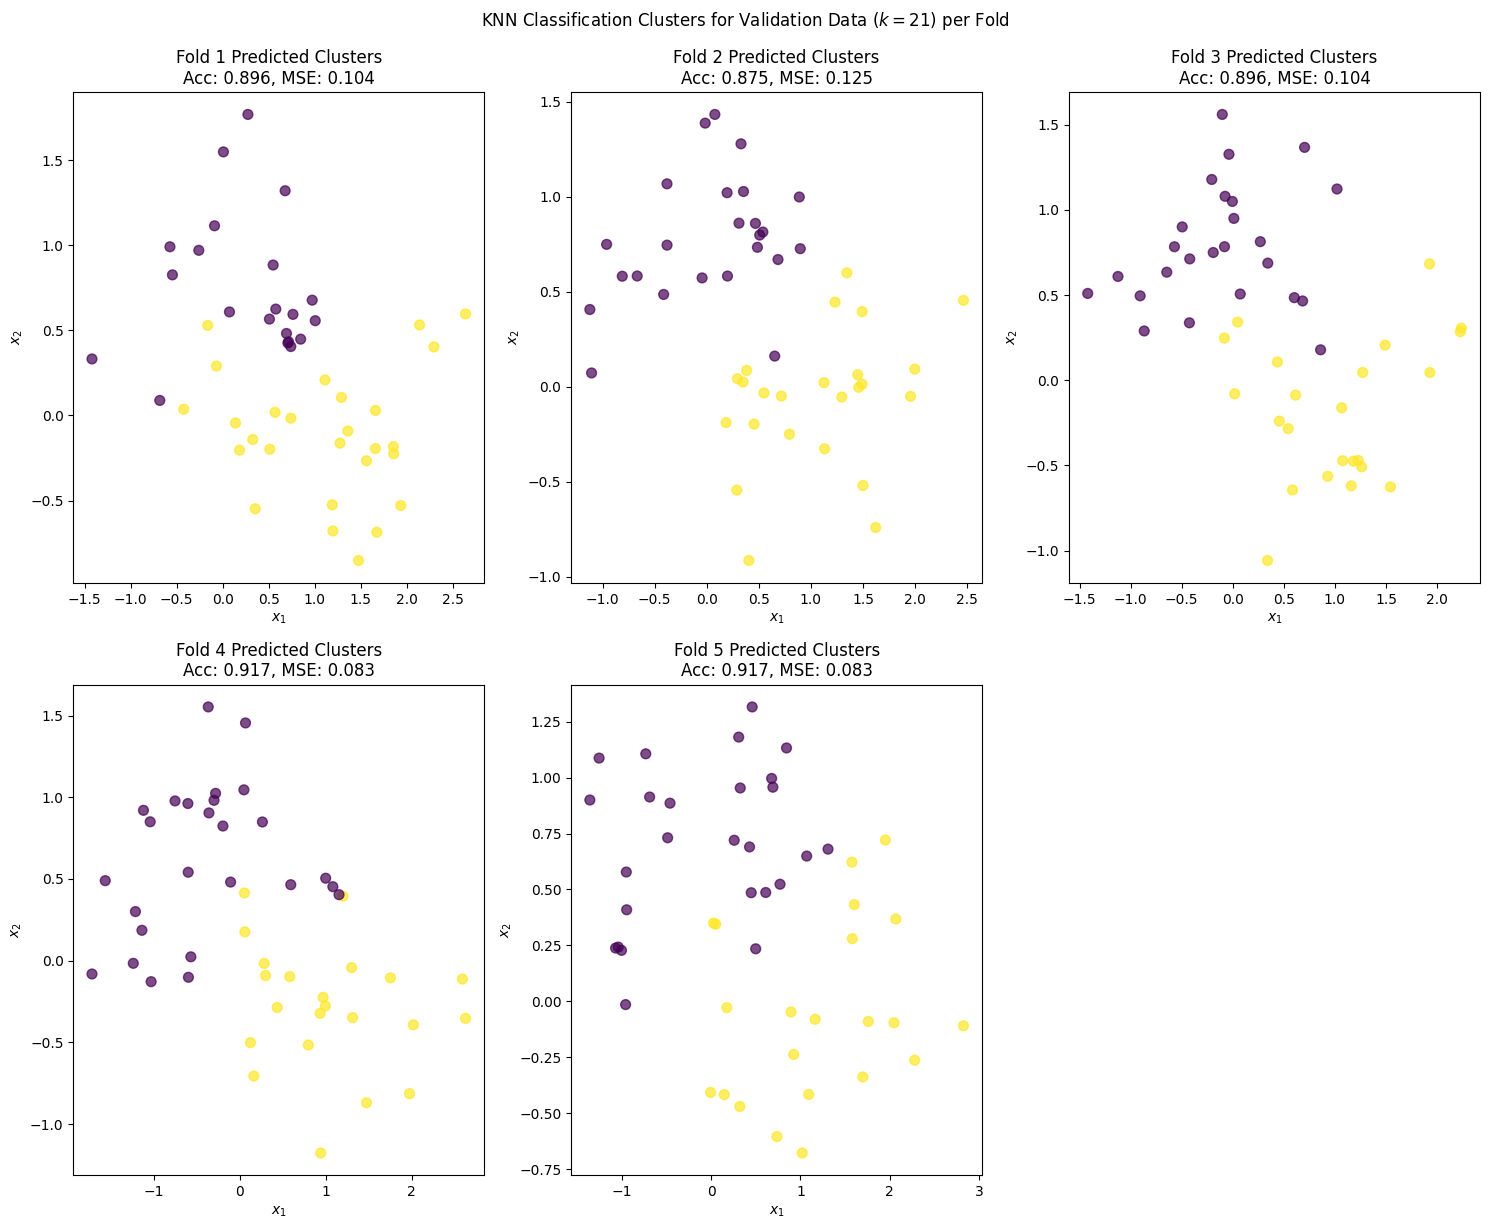


--- Final Report ---
• The value of k selected by 5 fold cross-validation: 21
• Training accuracy: 0.8917
• Validation accuracy (Best 5-fold CV Score): 0.9000
• Test accuracy: 0.8500


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

df = pd.read_csv('/content/sample_data/points_KNN.csv')

X = df[['x1', 'x2']]
y = df['label']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

optimal_k = 21
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

plt.figure(figsize=(15, 12))

X_train_full = X_train_full.reset_index(drop=True)
y_train_full = y_train_full.reset_index(drop=True)

for fold_idx, (train_index, val_index) in enumerate(skf.split(X_train_full, y_train_full)):
    X_train_fold, X_val_fold = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train_fold, y_val_fold = y_train_full.iloc[train_index], y_train_full.iloc[val_index]

    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train_fold, y_train_fold)

    y_val_pred = knn.predict(X_val_fold)

    accuracy = accuracy_score(y_val_fold, y_val_pred)
    mse = mean_squared_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)

    print(f"\n--- Fold {fold_idx + 1}/{n_splits} Metrics ---")
    print(f"Accuracy (Correct Metric): {accuracy:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    plt.subplot(2, 3, fold_idx + 1)

    plt.scatter(X_val_fold['x1'], X_val_fold['x2'], c=y_val_pred, cmap='viridis', s=50, alpha=0.7)

    plt.title(f'Fold {fold_idx + 1} Predicted Clusters\nAcc: {accuracy:.3f}, MSE: {mse:.3f}')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

plt.tight_layout()
plt.suptitle(f"KNN Classification Clusters for Validation Data ($k={optimal_k}$) per Fold", y=1.02)
plt.show()

final_model = KNeighborsClassifier(n_neighbors=optimal_k)
final_model.fit(X_train_full, y_train_full)

train_accuracy = final_model.score(X_train_full, y_train_full)
test_accuracy = final_model.score(X_test, y_test)

print("\n--- Final Report ---")
print(f"• The value of k selected by 5 fold cross-validation: {optimal_k}")
print(f"• Training accuracy: {train_accuracy:.4f}")
print(f"• Validation accuracy (Best 5-fold CV Score): {best_val_score:.4f}")
print(f"• Test accuracy: {test_accuracy:.4f}")

## **Question 3**
Using Python (scikit-learn), generate a synthetic regression dataset with n = 200 observations
and p = 5 predictors.
(a) Fit a linear regression model (parametric, inflexible).
(b) Fit a decision tree regressor (non-parametric, flexible).
(c) Compare their test mean squared errors (MSE) on a held-out test set.
(d) Plot the training error and test error of the decision tree model as a function of tree depth.
(e) Using the plot, explain how the bias–variance trade-off is illustrated. At what depth
do you see signs of overfitting?
(f) Discuss under what conditions the flexible method outperforms the inflexible one, and
vice versa.

--- (c) Test Mean Squared Error Comparison ---
Linear Regression (Inflexible) Test MSE: 157.7821
Decision Tree Default (Flexible) Test MSE: 2424.0644


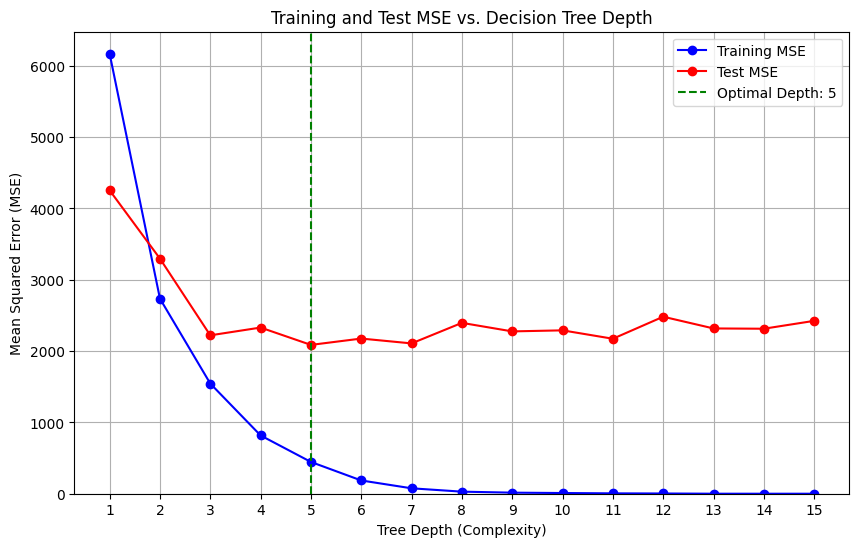


Error Data by Depth:
|   Depth |    Train_MSE |   Test_MSE |
|--------:|-------------:|-----------:|
|       1 | 6169.94      |    4254.3  |
|       2 | 2735.49      |    3296.88 |
|       3 | 1544.82      |    2221.1  |
|       4 |  817.199     |    2330.01 |
|       5 |  445.414     |    2086.9  |
|       6 |  185.858     |    2175.83 |
|       7 |   75.9531    |    2107.81 |
|       8 |   28.9449    |    2395.74 |
|       9 |   14.9063    |    2276.27 |
|      10 |    9.88756   |    2290.89 |
|      11 |    5.11603   |    2173.18 |
|      12 |    3.26047   |    2482.11 |
|      13 |    0.188249  |    2317.66 |
|      14 |    0.0301952 |    2313.7  |
|      15 |    0         |    2424.06 |


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X, y = make_regression(
    n_samples=200,
    n_features=5,
    n_informative=4,
    n_targets=1,
    noise=10.0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

tree_model_default = DecisionTreeRegressor(random_state=42)
tree_model_default.fit(X_train, y_train)
y_pred_tree_default = tree_model_default.predict(X_test)
mse_tree_default = mean_squared_error(y_test, y_pred_tree_default)

print(f"--- (c) Test Mean Squared Error Comparison ---")
print(f"Linear Regression (Inflexible) Test MSE: {mse_linear:.4f}")
print(f"Decision Tree Default (Flexible) Test MSE: {mse_tree_default:.4f}")

depths = range(1, 16)
train_errors = []
test_errors = []

for depth in depths:
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)

    y_train_pred = tree_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)

    y_test_pred = tree_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)

optimal_depth = depths[np.argmin(test_errors)]

plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training MSE', marker='o', color='blue')
plt.plot(depths, test_errors, label='Test MSE', marker='o', color='red')
plt.axvline(x=optimal_depth, color='green', linestyle='--', label=f'Optimal Depth: {optimal_depth}')
plt.title('Training and Test MSE vs. Decision Tree Depth')
plt.xlabel('Tree Depth (Complexity)')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.ylim(bottom=0)
plt.show()

error_data = pd.DataFrame({'Depth': depths, 'Train_MSE': train_errors, 'Test_MSE': test_errors})
print("\nError Data by Depth:")
print(error_data.to_markdown(index=False))